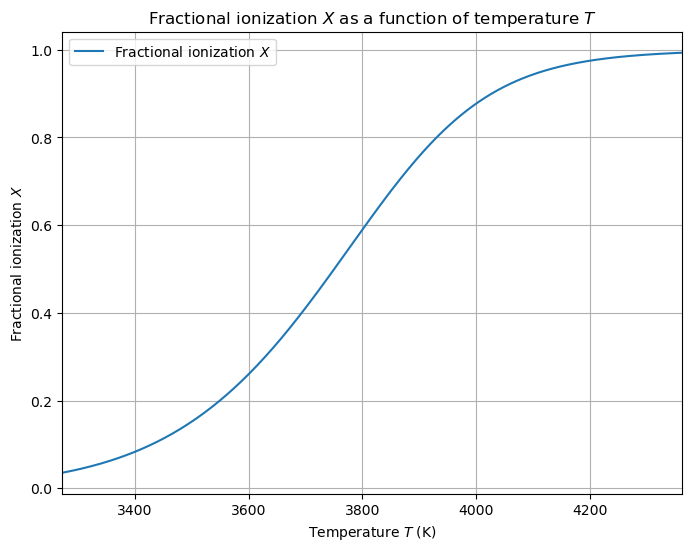

Integrated result using Simpson's rule: 227.50340976297974


In [1]:
#fractional Ionisation VS temperature
import numpy as np
import matplotlib.pyplot as plt

# Manually defining constants
eta = 5.5e-10
k = 1.380649e-23  # Boltzmann constant in J/K
m_e = 9.10938356e-31  # electron mass in kg
c = 2.99792458e8  # speed of light in m/s
Q = 13.6 * 1.60218e-19  # ionization energy of hydrogen in J (13.6 eV to Joules)

# Define the function S(T, eta)
def S(T, eta):
    return 3.84 * eta * (k * T / (m_e * c**2))**(3/2) * np.exp(Q / (k * T))

# Define the function X(S)
def X(S):
    return (-1 + np.sqrt(1 + 4 * S)) / (2 * S)

# Ensure the number of intervals is even by using an even number of points
num_points = 401  # Choose an odd number to get an even number of intervals
if num_points % 2 == 0:
    num_points += 1

z = np.linspace(1200, 1600, num_points)
# Convert redshift to temperature T (assuming T = T0 * (1 + z) where T0 is the current CMB temperature)
T0 = 2.725  # current CMB temperature in K
T = T0 * (1 + z)

# Calculate S(T, eta) and X(S(T, eta))
S_values = S(T, eta)
X_values = X(S_values)

# Implementing Simpson's 1/3rd rule manually
def simpsons_rule_manual(x, y):
    n = len(x) - 1
    if n % 2 == 1:
        raise ValueError("Number of intervals must be even")
    h = (x[-1] - x[0]) / n
    integral = y[0] + y[-1]
    for i in range(1, n, 2):
        integral += 4 * y[i]
    for i in range(2, n, 2):
        integral += 2 * y[i]
    integral *= h / 3
    return integral

# Integrate X(z) using Simpson's rule manually
integral_result = simpsons_rule_manual(z, X_values)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(T, X_values, label="Fractional ionization $X$")
plt.xlabel('Temperature $T$ (K)')
plt.ylabel('Fractional ionization $X$')
plt.title('Fractional ionization $X$ as a function of temperature $T$')
plt.grid(True)
plt.legend()
plt.xlim(T[0], T[-1])  # Set x-axis limits according to temperature
plt.show()

print("Integrated result using Simpson's rule:", integral_result)

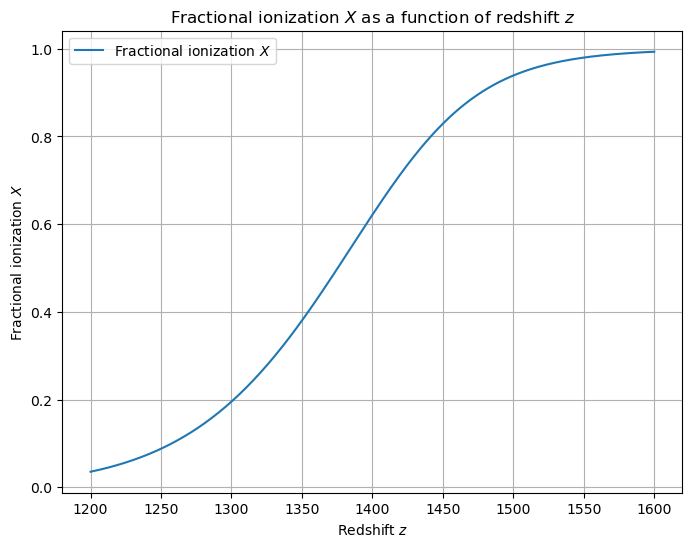

Integrated result using Simpson's rule: 227.50340976297974


In [2]:
#fractional Ionisation VS redshift
import numpy as np
import matplotlib.pyplot as plt

# Manually defining constants
eta = 5.5e-10
k = 1.380649e-23  # Boltzmann constant in J/K
m_e = 9.10938356e-31  # electron mass in kg
c = 2.99792458e8  # speed of light in m/s
Q = 13.6 * 1.60218e-19  # ionization energy of hydrogen in J (13.6 eV to Joules)

# Define the function S(T, eta)
def S(T, eta):
    return 3.84 * eta * (k * T / (m_e * c**2))**(3/2) * np.exp(Q / (k * T))

# Define the function X(S)
def X(S):
    return (-1 + np.sqrt(1 + 4 * S)) / (2 * S)

# Ensure the number of intervals is even by using an even number of points
num_points = 401  # Choose an odd number to get an even number of intervals
if num_points % 2 == 0:
    num_points += 1

z = np.linspace(1200, 1600, num_points)
# Convert redshift to temperature T (assuming T = T0 * (1 + z) where T0 is the current CMB temperature)
T0 = 2.725  # current CMB temperature in K
T = T0 * (1 + z)

# Calculate S(T, eta) and X(S(T, eta))
S_values = S(T, eta)
X_values = X(S_values)

# Implementing Simpson's 1/3rd rule manually
def simpsons_rule_manual(x, y):
    n = len(x) - 1
    if n % 2 == 1:
        raise ValueError("Number of intervals must be even")
    h = (x[-1] - x[0]) / n
    integral = y[0] + y[-1]
    for i in range(1, n, 2):
        integral += 4 * y[i]
    for i in range(2, n, 2):
        integral += 2 * y[i]
    integral *= h / 3
    return integral

# Integrate X(z) using Simpson's rule manually
integral_result = simpsons_rule_manual(z, X_values)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(z, X_values, label="Fractional ionization $X$")
plt.xlabel('Redshift $z$')
plt.ylabel('Fractional ionization $X$')
plt.title('Fractional ionization $X$ as a function of redshift $z$')
plt.grid(True)
plt.legend()
plt.show()

print("Integrated result using Simpson's rule:", integral_result)


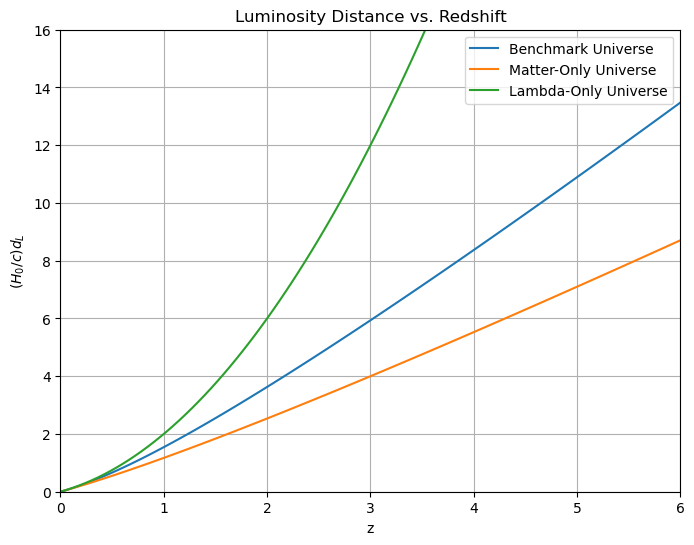

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
H0 = 70  # Hubble constant in km/s/Mpc
c = 3e5  # speed of light in km/s

# Define the dimensionless Hubble parameter E(z) for different universes
def E(z, Omega_m, Omega_Lambda):
    return np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

# Function to be integrated
def integrand(z, Omega_m, Omega_Lambda):
    return 1 / E(z, Omega_m, Omega_Lambda)

# Simpson's method implementation
def simpsons_rule(f, a, b, N, Omega_m, Omega_Lambda):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    y = f(x, Omega_m, Omega_Lambda)
    S = y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])
    return (h / 3) * S

# Define the redshift range and number of sub-intervals
z_values = np.linspace(0, 6, 100)
N = 100  # number of sub-intervals

# Define universe parameters
universes = {
    "Benchmark Universe": (0.3, 0.7),
    "Matter-Only Universe": (1, 0),
    "Lambda-Only Universe": (0, 1)
}

# Calculate luminosity distance for each universe and redshift value
results = {universe_name: [] for universe_name in universes}
for universe_name, (Omega_m, Omega_Lambda) in universes.items():
    for z in z_values:
        integral_result = simpsons_rule(integrand, 0, z, N, Omega_m, Omega_Lambda)
        d_L = (1 + z) * (c / H0) * integral_result
        results[universe_name].append((H0 / c) * d_L)

# Plotting
plt.figure(figsize=(8, 6))
for universe_name, d_L_values in results.items():
    plt.plot(z_values, d_L_values, label=universe_name)

plt.xlabel('z')
plt.ylabel(r'$(H_0/c) d_L$')
plt.xlim(0, 6)
plt.ylim(0, 16)
plt.legend()
plt.grid(True)
plt.title('Luminosity Distance vs. Redshift')
plt.show()


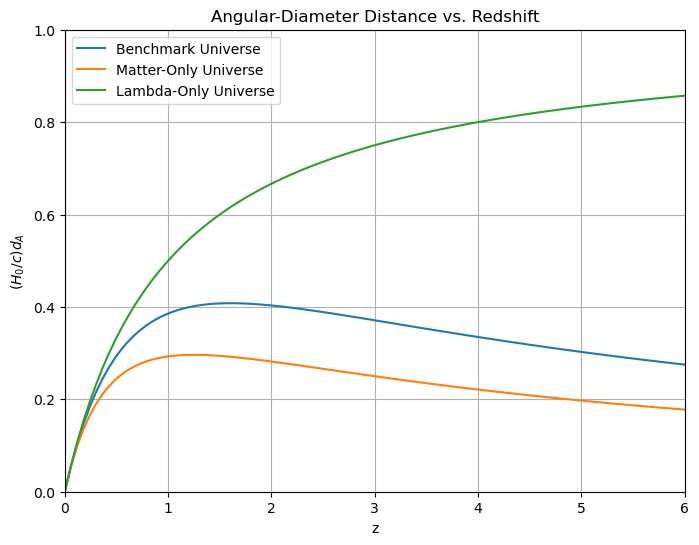

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
H0 = 70  # Hubble constant in km/s/Mpc
c = 3e5  # speed of light in km/s

# Define the dimensionless Hubble parameter E(z) for different universes
def E(z, Omega_m, Omega_Lambda):
    return np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

# Function to be integrated
def integrand(z, Omega_m, Omega_Lambda):
    return 1 / E(z, Omega_m, Omega_Lambda)

# Simpson's method implementation
def simpsons_rule(f, a, b, N, Omega_m, Omega_Lambda):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    y = f(x, Omega_m, Omega_Lambda)
    S = y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])
    return (h / 3) * S

# Define the redshift range and number of sub-intervals
z_values = np.linspace(0, 6, 100)
N = 100  # number of sub-intervals

# Define universe parameters
universes = {
    "Benchmark Universe": (0.3, 0.7),
    "Matter-Only Universe": (1, 0),
    "Lambda-Only Universe": (0, 1)
}

# Calculate angular-diameter distance for each universe and redshift value
results = {universe_name: [] for universe_name in universes}
for universe_name, (Omega_m, Omega_Lambda) in universes.items():
    for z in z_values:
        integral_result = simpsons_rule(integrand, 0, z, N, Omega_m, Omega_Lambda)
        d_L = (1 + z) * (c / H0) * integral_result
        d_A = d_L / (1 + z)**2
        results[universe_name].append((H0 / c) * d_A)

# Plotting
plt.figure(figsize=(8, 6))
for universe_name, d_A_values in results.items():
    plt.plot(z_values, d_A_values, label=universe_name)

plt.xlabel('z')
plt.ylabel(r'$(H_0/c) d_A$')
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.title('Angular-Diameter Distance vs. Redshift')
plt.show()

13.677277428253836
29
0.00029000000191624613
-0.9505779717500613
0.7655000000010672
-0.24808849300594238


/tmp/ipykernel_102094/3835294472.py:77: RuntimeWarning: divide by zero encountered in log10
  log_t_values_2 = np.log10(t_values_2)
/tmp/ipykernel_102094/3835294472.py:77: RuntimeWarning: invalid value encountered in log10
  log_t_values_2 = np.log10(t_values_2)


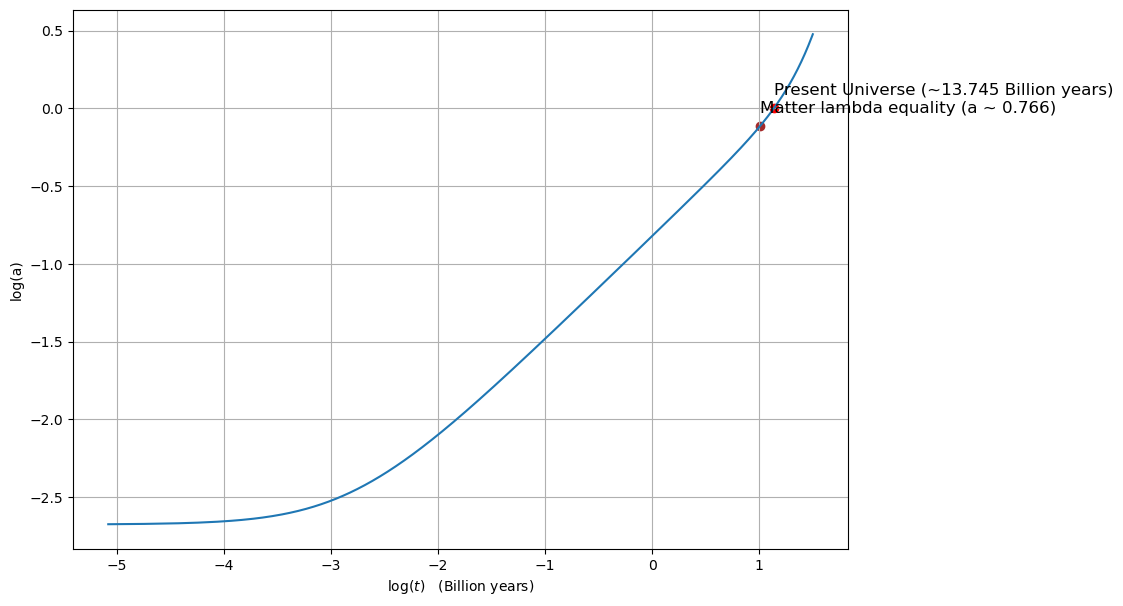

In [5]:
#benchmark universe
import math
import numpy as np
from matplotlib import pyplot as plt

# Simpson's 1/3 rule
def simpson(f, a, b, n):
    h = (b - a) / n
    s = f(a) + f(b)
    
    for i in range(1, n, 2):
        s += 4 * f(a + i * h)
    
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h)
    
    return s * h / 3

# Define the constants
Omega_r0 = 8.4e-5  # Radiation density parameter
Omega_m0 = 0.315  # Matter density parameter
Omega_Lambda0 = 0.685  # Dark energy density parameter
Omega_0 = Omega_r0 + Omega_m0 + Omega_Lambda0  # Total density parameter, should be close to 1

# Define the function to integrate
def integrand(a):
    return 1 / math.sqrt((Omega_r0 / a**2) + (Omega_m0 / a) + (Omega_Lambda0 * a**2) + (1 - Omega_0))                                                            
  
  
# Data collection for x > 1
x_21 = []
y_21 = []
i = 1.001
while i < 3:
    x_21.append(simpson(integrand, 1, i, 1000))
    y_21.append(i)
    i += 0.001

# Data collection for x < 1
x_22 = []
y_22 = []
i = 0.99999
while i > 0:
    x_22.append(simpson(integrand, 1, i, 100))
    y_22.append(i)
    i -= 0.00001

# Reverse the lists for x < 1
x_22 = x_22[::-1]
y_22 = y_22[::-1]

# Combine the data points
xvalues_2 = x_22 + x_21
yvalues_2 = y_22 + y_21
t_values_2 = [14.389 * (value - xvalues_2[0]) for value in xvalues_2]
print(-1 * xvalues_2[0] * 14.389)

# Finding the specific points of interest
for i in range(len(yvalues_2)):
    if round(yvalues_2[i], 5) < 0.00030 and round(yvalues_2[i], 5) > 0.00028:
        locrm = i
        print(i)
        break

print(yvalues_2[i])
print(xvalues_2[i])

for i in range(len(yvalues_2)):
    if round(yvalues_2[i], 3) == 0.766:
        locml = i
        break

print(yvalues_2[i])
print(xvalues_2[i])

# Logarithmic transformation
log_t_values_2 = np.log10(t_values_2)
log_yvalues_2 = np.log10(yvalues_2)

# Plotting the final graph with annotations in log scale
plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(log_t_values_2, log_yvalues_2)
plt.scatter(log_t_values_2[locrm], log_yvalues_2[locrm], color='blue')
plt.scatter(log_t_values_2[locml], log_yvalues_2[locml], color='brown')
plt.scatter(log_t_values_2[100000], log_yvalues_2[100000], color='red')
plt.annotate('Radiation matter equality (a ~ 0.00029)', (log_t_values_2[locrm], log_yvalues_2[locrm]), textcoords="offset points", xytext=(0, 10), ha='left', size=12)
plt.annotate('Matter lambda equality (a ~ 0.766)', (log_t_values_2[locml], log_yvalues_2[locml]), textcoords="offset points", xytext=(0, 10), ha='left', size=12)
plt.annotate('Present Universe (~13.745 Billion years)', (log_t_values_2[100000], log_yvalues_2[100000]), textcoords="offset points", xytext=(0, 10), ha='left', size=12)
plt.rc('font', size=12)
plt.xlabel("log($t$)   (Billion years)")
plt.ylabel("log(a)")
plt.show()

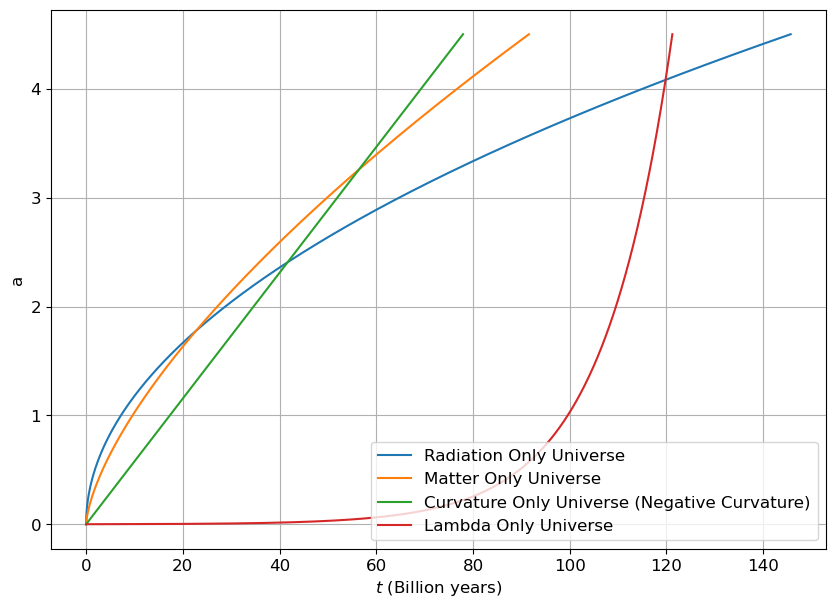

In [6]:
#scale factor of single universe
import math
import numpy as np
import matplotlib.pyplot as plt

# Simpson's 1/3 rule for numerical integration
def simpson(f, a, b, n):
    h = (b - a) / n
    s = f(a) + f(b)
    
    for i in range(1, n, 2):
        s += 4 * f(a + i * h)
    
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h)
    
    return s * h / 3                    
                      
                      
# Define the expressions as lambda functions
exp_1 = lambda x: 1 / math.sqrt(1 / (x * x))
exp_2 = lambda x: 1 / math.sqrt(1 / x)
exp_3 = lambda x: 1 / math.sqrt(0.69)
exp_4 = lambda x: 1 / math.sqrt(x * x)

# Initialize lists to store integration results
x_11, y_11 = [], []
x_12, y_12 = [], []
x_21, y_21 = [], []
x_22, y_22 = [], []
x_31, y_31 = [], []
x_32, y_32 = [], []
x_41, y_41 = [], []
x_42, y_42 = [], []

# Calculate integrations for each expression
i = 1.001
while i < 4.5:
    x_11.append(simpson(exp_1, 1, i, 1000))
    y_11.append(i)
    i += 0.001

i = 0.999
while i > 0:
    x_12.append(simpson(exp_1, 1, i, 1000))
    y_12.append(i)
    i -= 0.001

i = 1.001
while i < 4.5:
    x_21.append(simpson(exp_2, 1, i, 1000))
    y_21.append(i)
    i += 0.001

i = 0.999
while i > 0:
    x_22.append(simpson(exp_2, 1, i, 1000))
    y_22.append(i)
    i -= 0.001

i = 1.001
while i < 4.5:
    x_31.append(simpson(exp_3, 1, i, 1000))
    y_31.append(i)
    i += 0.001

i = 0.999
while i > 0:
    x_32.append(simpson(exp_3, 1, i, 1000))
    y_32.append(i)
    i -= 0.001

i = 1.001
while i < 4.5:
    x_41.append(simpson(exp_4, 1, i, 1000))
    y_41.append(i)
    i += 0.001

i = 0.999
while i > 0:
    x_42.append(simpson(exp_4, 1, i, 1000))
    y_42.append(i)
    i -= 0.001

# Concatenate lists for plotting
xvalues_1 = x_12[::-1] + x_11
yvalues_1 = y_12[::-1] + y_11
t_values_1 = [14.389 * (value - xvalues_1[0]) for value in xvalues_1]

xvalues_2 = x_22[::-1] + x_21
yvalues_2 = y_22[::-1] + y_21
t_values_2 = [14.389 * (value - xvalues_2[0]) for value in xvalues_2]

xvalues_3 = x_32[::-1] + x_31
yvalues_3 = y_32[::-1] + y_31
t_values_3 = [14.389 * (value - xvalues_3[0]) for value in xvalues_3]

xvalues_4 = x_42[::-1] + x_41
yvalues_4 = y_42[::-1] + y_41
t_values_4 = [14.389 * (value - xvalues_4[0]) for value in xvalues_4]

# Plotting
plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(t_values_1, yvalues_1, label="Radiation Only Universe")
plt.plot(t_values_2, yvalues_2, label="Matter Only Universe")
plt.plot(t_values_3, yvalues_3, label="Curvature Only Universe (Negative Curvature)")
plt.plot(t_values_4, yvalues_4, label="Lambda Only Universe")
plt.xlabel("$t$ (Billion years)")
plt.ylabel("a")
plt.legend()
plt.show()                                                                                                                                            


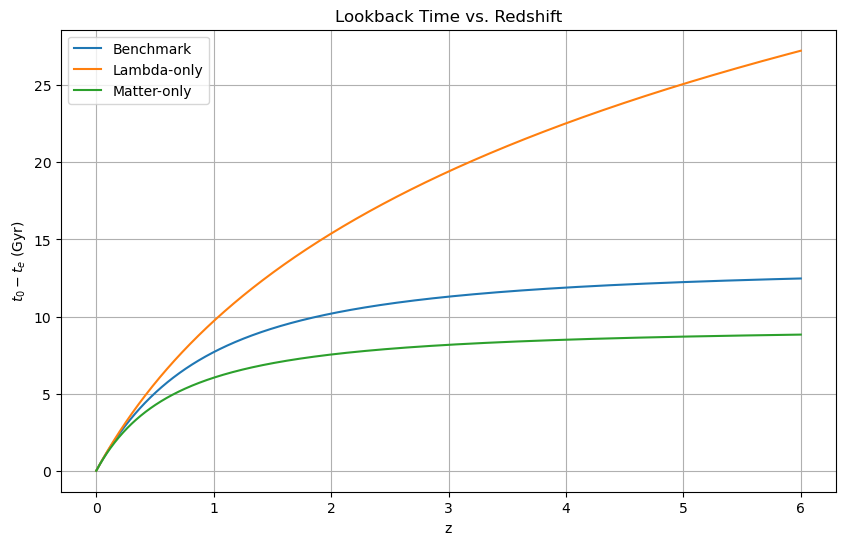

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hubble constant in Gyr^-1
H0 = 1 / 14.0  # 14 Gyr

# Define the Hubble parameter for different models
def H_z(z, omega_m, omega_lambda):
    return H0 * np.sqrt(omega_m * (1 + z)**3 + omega_lambda)

# Simpson's 1/3 rule for numerical integration
def simpsons_rule(func, a, b, n, omega_m, omega_lambda):
    if n % 2 == 1:  # n must be even
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    fx = func(x, omega_m, omega_lambda)
    result = fx[0] + fx[-1] + 4 * np.sum(fx[1:-1:2]) + 2 * np.sum(fx[2:-2:2])
    return result * h / 3

# Integrand for lookback time
def integrand(z, omega_m, omega_lambda):
    return 1 / ((1 + z) * H_z(z, omega_m, omega_lambda))

# Calculate the lookback time
def lookback_time(z, omega_m, omega_lambda, n):
    return np.array([simpsons_rule(integrand, 0, zi, n, omega_m, omega_lambda) for zi in z])

# Redshift range
z = np.linspace(0, 6, 1000)

# Parameters for different models
params = {
    'Benchmark': (0.31, 0.69),
    'Lambda-only': (0.0, 1.0),
    'Matter-only': (1.0, 0.0)
}

# Calculate lookback times
lookback_times = {model: lookback_time(z, *params[model], 1000) for model in params}

# Plotting
plt.figure(figsize=(10, 6))
for model in lookback_times:
    plt.plot(z, lookback_times[model], label=model)

plt.xlabel('z')
plt.ylabel(r'$t_0 - t_e$ (Gyr)')
plt.title('Lookback Time vs. Redshift')
plt.legend()
plt.grid(True)
plt.show()
